# Kmeans Clustering

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import pandas as pd
import numpy as np

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Set max rows and columns displayed in jupyter
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

#the following gives access to utils folder
#where utils package stores shared code
import os
import sys
PROJECT_ROOT = os.path.abspath(os.path.join(
                  os.getcwd(),
                  os.pardir)
)

#only add it once
if (PROJECT_ROOT not in sys.path):
    sys.path.append(PROJECT_ROOT)

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

## Constants and Functions

In [2]:
NUMB_SAMPLES=150
K_CLUSTERS = 3

import random
def get_random_centroids(X,k):
    '''
    returns k centroids randomly chosen from
    the number of points in X
    '''
    centroids=[]
    for i in range(k):
        r=random.randint(0, NUMB_SAMPLES)
        centroids.append([X[r,0],X[r,1],i])
    return np.array(centroids)

## Generate some data 
generate a synthetic dataset using sklearns makeblobs , see <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html">Make Blobs</a>

In [5]:
from sklearn.datasets import make_blobs

In [23]:
# Generate sample data
#note that y denotes group membership, something we are trying to predict
X,_=make_blobs(n_samples=NUMB_SAMPLES,
              n_features=2,
              centers=K_CLUSTERS,
              cluster_std=0.9,
              shuffle=True,
              random_state=0)

# General Algorithm
<ol>
    <li>Randomly pick *k* centroids from sample points as initial cluster centers</li>
    <li>Assign each sample to the nearest centroid</li>
    <li>Move the centroids to the center of the samples assigned to it</li>
    <li>Repeat steps 2 and 3 until cluster membership stops changing</li>
</ol>

## 1. Randomly pick *k* centroids from sample points as initial cluster centers

In [24]:
#get the centroids
centroids=get_random_centroids(X,K_CLUSTERS)
# centroids

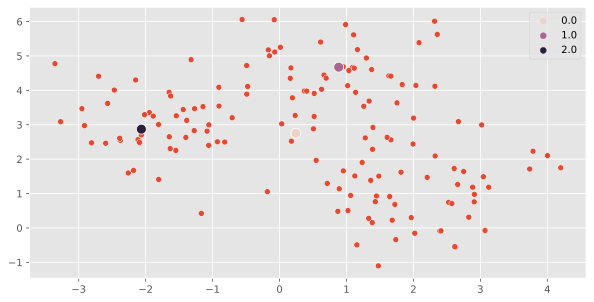

In [25]:
#lets see our random centroids and data
fig = plt.figure(figsize=(10,5));
sns.scatterplot(x=X[:,0],y=X[:,1]);
sns.scatterplot(x=centroids[:,0],y=centroids[:,1],s =100,hue=centroids[:,2]);

## 2. Assign each sample to the nearest centroid

In [26]:
#at this point its much easier to put things in a dataframe
# all_data = np.insert(X, 2, y, axis=1)
data = pd.DataFrame(data=X, columns=["X0","X1"])
data['guess_cluster']=-1
# data.head()

In [27]:
import math
def find_closest_cluster(df):
    # which cluster is this point closest to
    dsts = []
    for c in centroids:
        dsts.append( math.dist( (df[0],df[1]),(c[0],c[1])))
    
    #which centroid
    return float(dsts.index(min(dsts)))

data['guess_cluster']=data.apply(find_closest_cluster, axis=1)
# data.head()

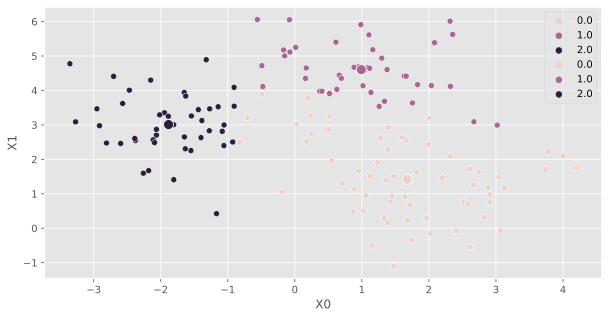

In [32]:
fig = plt.figure(figsize=(10,5));
sns.scatterplot(data=data, x='X0',y='X1',hue='guess_cluster');
sns.scatterplot(x=centroids[:,0],y=centroids[:,1],s =100, hue=centroids[:,2]);

## 3. Move the centroids to the center of the samples assigned to it

In [31]:
def find_mean(df):
    #find the mean
    return df.mean()

new_centroid_center = data.groupby('guess_cluster').apply(find_mean)
# new_centroid_center

for i in range(len(centroids)):
    centroids[i][0]=new_centroid_center.loc[i,'X0']
    centroids[i][1]=new_centroid_center.loc[i,'X1']
# centroids